# Fundamentals of Information Systems

## Python Programming (for Data Science)

### Master's Degree in Data Science

#### Giorgio Maria Di Nunzio
#### (Courtesy of Gabriele Tolomei FIS 2018-2019)
<a href="mailto:giorgiomaria.dinunzio@unipd.it">giorgiomaria.dinunzio@unipd.it</a><br/>
University of Padua, Italy<br/>
2021/2022<br/>

# Lecture 13: The Classification Problem - Example (Part 1)

## Instructions

-  We consider the dataset file <code>**dataset.csv**</code>, which is contained in the <code>**loan-prediction**</code> directory on the Moodle page.

-  A description of the dataset is available in the <code>**README.txt**</code> file on the same directory.

-  **GOAL:** Use information from past loan applicants contained in <code>**dataset.csv**</code> to predict whether a _new_ applicant should be granted a loan or not.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import stats module from scipy, which contains a large number 
# of probability distributions as well as an exhaustive library of statistical functions.
import scipy.stats as stats

%matplotlib inline

# 1. Data Collection

In [2]:
# Path to the local dataset file (YOURS MAY BE DIFFERENT!)
DATASET_PATH = "../data/loan-prediction/dataset.csv"

In [3]:
# Load the dataset with Pandas
data = pd.read_csv(DATASET_PATH, sep=",")
print("Shape of the dataset: {}".format(data.shape))
data.head()
# NOTE: the first line of the file is considered as the header

Shape of the dataset: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Let's have a look at the output of the `describe()` function.
data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## Observations from the ouput of <code>describe()</code> (Numerical Variables)

-  <code>**LoanAmount**</code> has 614-592 = **22** missing values
-  <code>**Loan_Amount_Term**</code> has 614-600 = **14** missing values
-  <code>**Credit_History**</code> has 614-564 = **50** missing values
-  We can also look that about 84% applicants have a credit history. How? The mean of <code>**Credit_History**</code> field is 0.84 (Remember, <code>**Credit_History**</code> has value 1 for those who have a credit history and 0 otherwise)
-  The <code>**ApplicantIncome**</code> distribution seems to be in line with expectation. Same with <code>**CoapplicantIncome**</code>.


In [5]:
# Let's have a look at the output of the `describe(include='all')` function.
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## Observations from the ouput of <code>describe(include='all')</code> (Categorical Variables)

-  <code>**Loan_ID**</code> has 614 **unique** values (will use this as our _index_ column)
-  <code>**Gender**</code> has 614-601 = **13** missing values
-  <code>**Married**</code> has 614-611 = **3** missing values
-  <code>**Dependents**</code> has 614-599 = **15** missing values
-  <code>**Self_Employed**</code> has 614-582 = **32** missing values

In [6]:
# Load the dataset with Pandas
data = pd.read_csv(DATASET_PATH, sep=",", index_col="Loan_ID")
print("Shape of the dataset: {}".format(data.shape))
data.head()
# NOTE: the first line of the file is considered as the header

Shape of the dataset: (614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Double-check for any Missing Values

In [7]:
# Check if there is any missing value in the whole dataset
print("There are missing values in the dataset: {}".
     format(data.isnull().any().any()))

There are missing values in the dataset: True


In [8]:
# Check how missing values are distributed across each variable (i.e., column)
data.apply(lambda x: sum(x.isnull()))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 2. Data Exploration

## 2.1 Analysis of Data Distributions: Continous Values

-  Let's start visualizing the distributions of the **3 continuous-valued** features:
    - <code>**ApplicantIncome**</code>
    - <code>**CoapplicantIncome**</code>
    - <code>**LoanAmount**</code> (contains 22 NAs)

In [9]:
# Create a lambda function which will be applied to each entry
# of the numpy 2-D array of AxesSubplot objects
# x is a reference to an AxesSubplot object
y_labeler = lambda x: x.set_ylabel('density')

# np.vectorize() allows calling the function on each element
y_labeler = np.vectorize(y_labeler)

/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

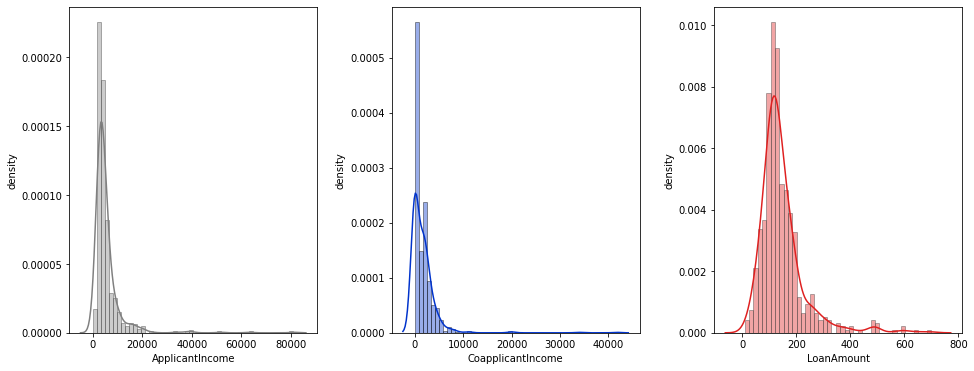

In [13]:
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16,6))
# Call the vectorized function for labeling all the y-axes
y_labeler(axes)
# Plot 'ApplicantIncome' on the first subplot
sns.distplot(data.ApplicantIncome, color='#808080', ax=axes[0], 
                 hist_kws=dict(edgecolor="#404040", linewidth=1))

# Plot 'CoapplicantIncome' on the second subplot
sns.distplot(data.CoapplicantIncome, color='#0033cc', ax=axes[1], 
                 hist_kws=dict(edgecolor="k", linewidth=1))

# Plot 'LoanAmount' (limited only to non-NA values) on the third and last subplot
sns.distplot(data.loc[data.LoanAmount.notnull(), 'LoanAmount'], 
                 color='#df2020', ax=axes[2], 
                 hist_kws=dict(edgecolor="#404040", linewidth=1))

# Adjust space between plots
plt.subplots_adjust(wspace=.3, hspace=.3)

## Observations

-  All the three distributions show the presence of some extreme values.

-  To investigate better how those are shaped, let's create some boxplots...

/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  wa

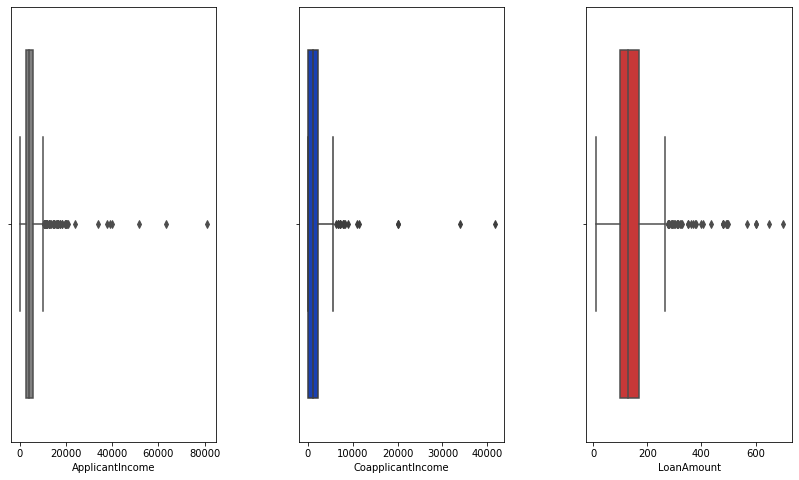

In [50]:
# Let's produce the boxplots corresponding to the distribution plots above
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(14,8))

sns.boxplot(data.ApplicantIncome, color='#808080', ax=axes[0], orient="v")
sns.boxplot(data.CoapplicantIncome, color='#0033cc', ax=axes[1], orient="v")
sns.boxplot(data.loc[data.LoanAmount.notnull(), 'LoanAmount'], 
                color='#df2020', ax=axes[2], orient="v")
plt.subplots_adjust(wspace=.4, hspace=.3)

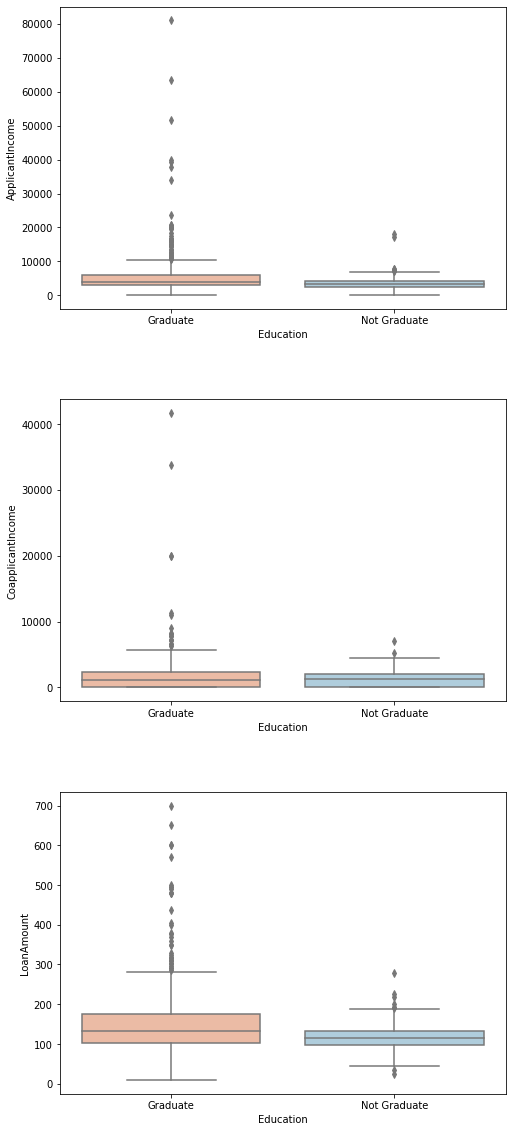

In [51]:
# Let's see if we can spot where those outliers are located
# w.r.t. other features (e.g., Education)
fig, axes = plt.subplots(3, 1, figsize=(8,20))

sns.boxplot(x=data.Education, y=data.ApplicantIncome, palette=sns.color_palette("RdBu", n_colors=2), ax=axes[0])

sns.boxplot(x=data.Education, y=data.CoapplicantIncome, palette=sns.color_palette("RdBu", n_colors=2), ax=axes[1])

sns.boxplot(x=data.Education, y=data.loc[data.LoanAmount.notnull(), 'LoanAmount'], 
                palette=sns.color_palette("RdBu", n_colors=2), ax=axes[2])

plt.subplots_adjust(wspace=.3, hspace=.3)

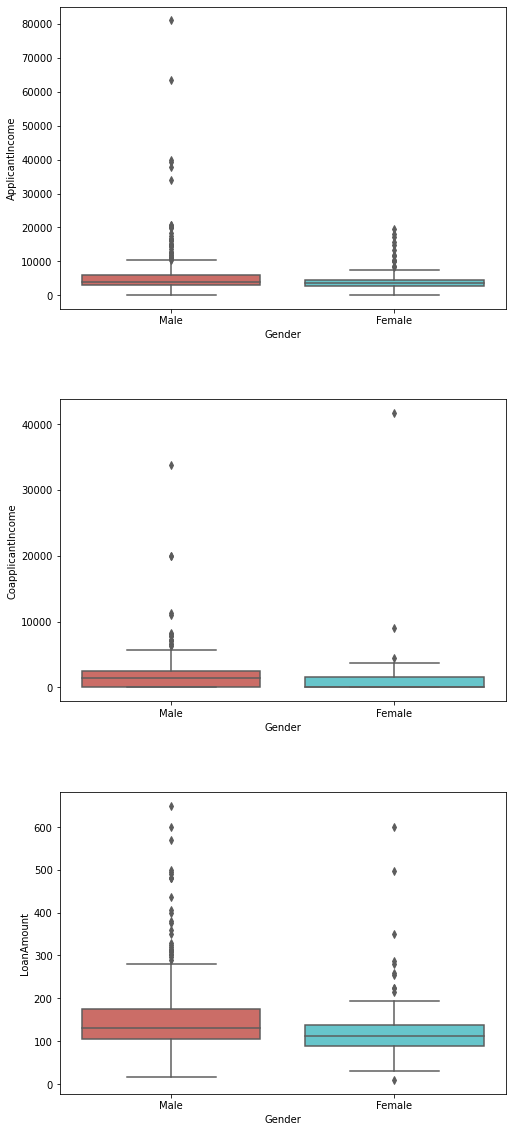

In [52]:
# Let's see if we can spot where those outliers are located
# w.r.t. other features (e.g., Gender)
fig, axes = plt.subplots(3, 1, figsize=(8,20))

sns.boxplot(x=data.Gender, y=data.ApplicantIncome, palette=sns.color_palette("hls", n_colors=2), ax=axes[0])

sns.boxplot(x=data.Gender, y=data.CoapplicantIncome, palette=sns.color_palette("hls", n_colors=2), ax=axes[1])

sns.boxplot(x=data.Gender, y=data.loc[data.LoanAmount.notnull(), 'LoanAmount'], 
                palette=sns.color_palette("hls", n_colors=2), ax=axes[2])

plt.subplots_adjust(wspace=.3, hspace=.3)

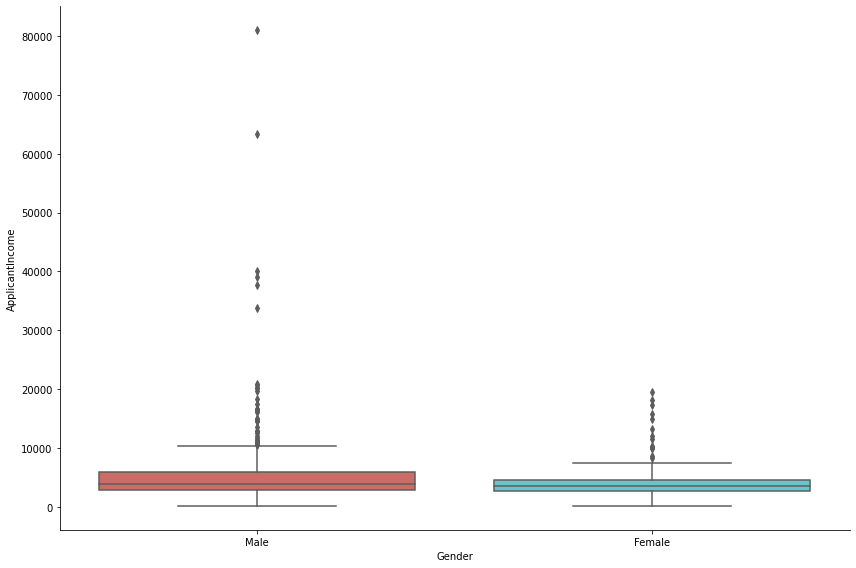

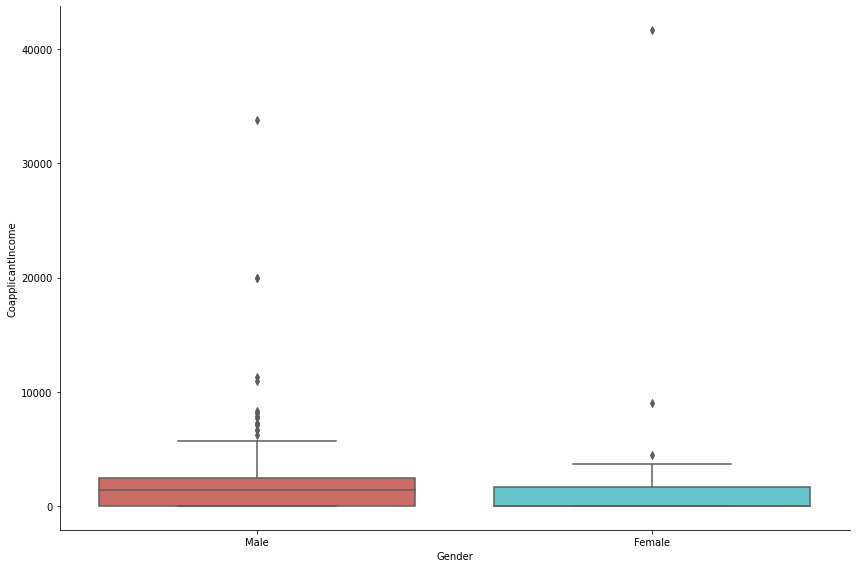

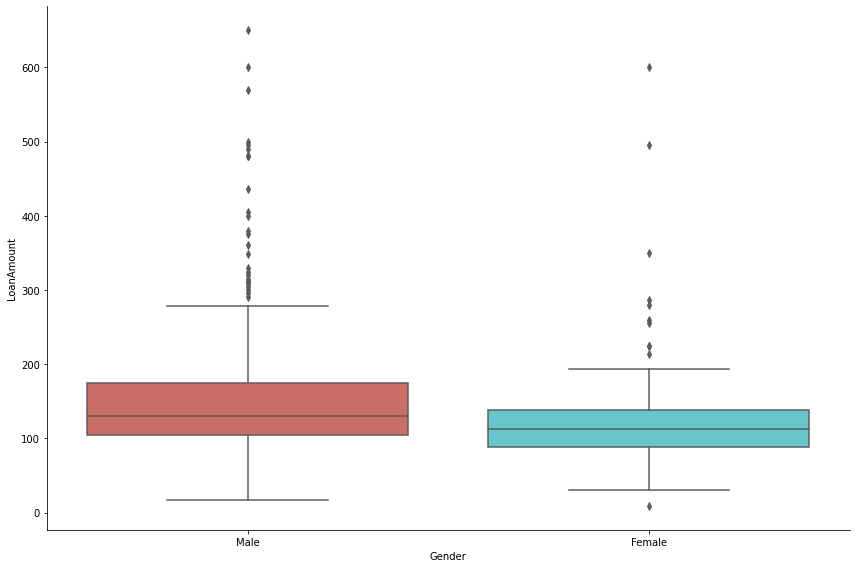

In [53]:
# The same plots can be produced using factorplot. Let's see only the last
# example (Gender)

sns.catplot(kind='box',          # Boxplot
            x='Gender',          # X-axis - first factor
            y='ApplicantIncome',  # Y-axis - values for boxplot
            # hue='Education',    # Second factor denoted by color
            data=data,           # Dataframe
            height=8,              # Figure size (x100px)
            aspect=1.5,          # Width = size * aspect
            legend_out=False,    # Make legend inside the plot
            palette=sns.color_palette("hls", n_colors=2)
            )

sns.catplot(kind='box',            # Boxplot
            x='Gender',            # X-axis - first factor
            y='CoapplicantIncome',  # Y-axis - values for boxplot
            # hue='Education',      # Second factor denoted by color
            data=data,             # Dataframe
            height=8,                # Figure size (x100px)
            aspect=1.5,            # Width = size * aspect
            legend_out=False,      # Make legend inside the plot
            palette=sns.color_palette("hls", n_colors=2)
            )

sns.catplot(kind='box',          # Boxplot
            x='Gender',          # X-axis - first factor
            y='LoanAmount',      # Y-axis - values for boxplot
            # hue='Education',    # Second factor denoted by color
            data=data.loc[data.LoanAmount.notnull()],           # Dataframe
            height=8,              # Figure size (x100px)
            aspect=1.5,          # Width = size * aspect
            legend_out=False,    # Make legend inside the plot
            palette=sns.color_palette("hls", n_colors=2)
            )

plt.subplots_adjust(wspace=.4, hspace=.3)


## Few Observations from the Plots

-  We can see that there is no substantial difference between the median income of graduates and non-graduates.

-  Similarly, there is no significant difference between the median income of males and females.

-  However, there are a higher number of graduates (respectively, males) with very high incomes, which are appearing to be the outliers.

-  The presence of outliers in all these three numerical variables (<code>**ApplicantIncome**</code>, <code>**CoapplicantIncome**</code>, and <code>**LoanAmount**</code>), as well as missing values (only for <code>**LoanAmount**</code>) require some data munging steps (more on this later). 

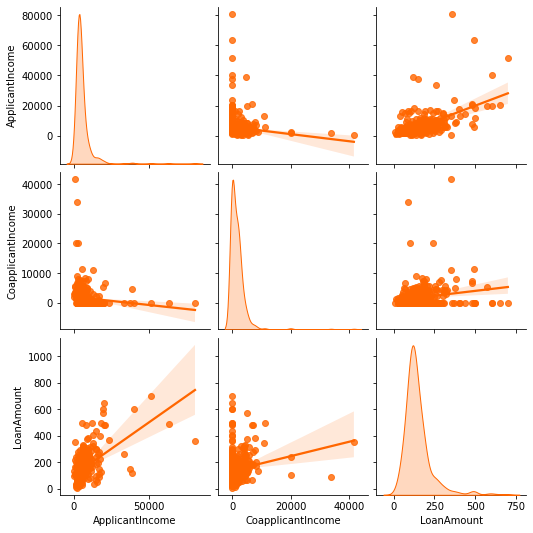

In [54]:
# Let's now plot the pairwise relationship between our continuous-valued features
sns.pairplot(data.loc[data.LoanAmount.notnull(),
                          ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']],
                 kind="reg",
                 diag_kind='kde', 
                 diag_kws={'shade': True, 'color': '#ff6600'}, 
                 plot_kws={'color': '#ff6600'})

## How Continuous-valued Features Relate to Each Other

-  As <code>**LoanAmount**</code> increases, so do <code>**ApplicantIncome**</code> (or <code>**CoapplicantIncome**</code>) increases.

-  Apparently, though, there is no strong (linear) relationship between <code>**ApplicantIncome**</code> and <code>**CoapplicantIncome**</code>. 

## 2.1 Analysis of Data Distributions: Categorical Values

-  Let's visualize the distributions of the **8 categorical** features (except the target class label):
    - <code>**Gender**</code>
    - <code>**Married**</code>
    - <code>**Dependents**</code>
    - <code>**Education**</code>
    - <code>**Self_Employed**</code>
    - <code>**Loan_Amount_Term**</code>
    - <code>**Credit_History**</code>
    - <code>**Property_Area**</code>

In [55]:
# Let's see the frequency counts of the first three categorical variable
# Try to do the same for the remaining 5
# 'Gender'
print(data.Gender.value_counts())
print()

# 'Married'
print(data.Married.value_counts())
print()

# 'Dependents'
print(data.Dependents.value_counts())

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo

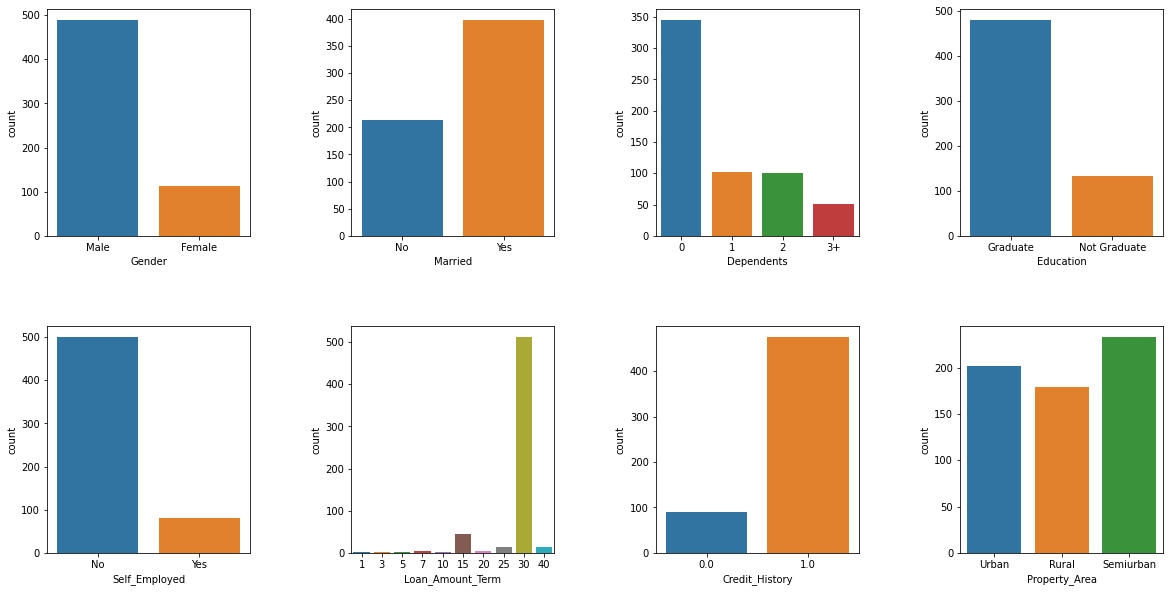

In [56]:
# For categorical variables, 'countplot' is the way to go
# Create a Figure containing 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(20,10))

# Plots
sns.countplot(data.loc[data.Gender.notnull()]['Gender'], ax=axes[0,0])
sns.countplot(data.loc[data.Married.notnull()]['Married'], ax=axes[0,1])
sns.countplot(data.loc[data.Dependents.notnull()]['Dependents'], ax=axes[0,2])
sns.countplot(data.loc[data.Education.notnull()]['Education'], ax=axes[0,3])
sns.countplot(data.loc[data.Self_Employed.notnull()]['Self_Employed'], ax=axes[1,0])
sns.countplot(data.loc[data.Loan_Amount_Term.notnull()]['Loan_Amount_Term'].map(lambda x: int(x/12)), ax=axes[1,1])
sns.countplot(data.loc[data.Credit_History.notnull()]['Credit_History'], ax=axes[1,2])
sns.countplot(data.loc[data.Property_Area.notnull()]['Property_Area'], ax=axes[1,3])

plt.subplots_adjust(wspace=.5, hspace=.4)

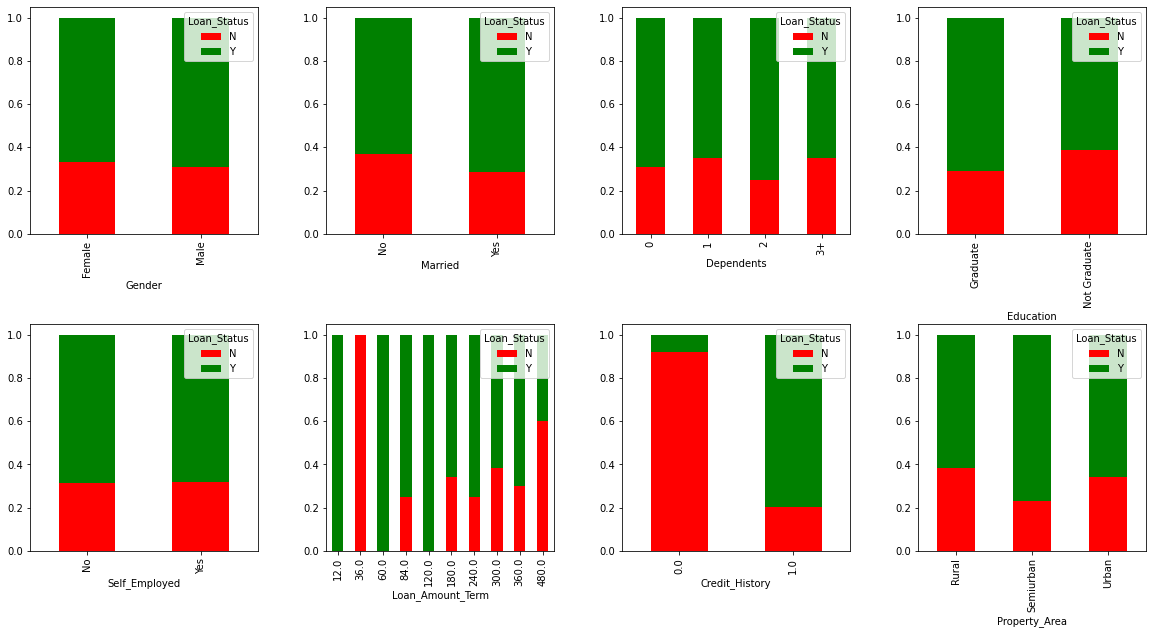

In [57]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
        'Loan_Amount_Term', 'Credit_History', 'Property_Area']
i = 0
for c in cols:
    tmp_data = pd.crosstab(data.loc[:, c], data.Loan_Status)
    # pandas.crosstab returns an mxn table where m is the number of values for the first argument (x) 
    # and n for the second argument (y)
    # As the second argument is always data.Loan_Status, n = 2 (Loan_Status is binary!)
    # e.g., x = 'Credit_History'; y = 'Loan_Status'
    # the following apply is used to transform the crosstab into a "normalized" table as follows:
    # each entry in the table displays how the i-th categorical value of x (i.e., i-th row) is distributed across
    # all the possible values of y (i.e., Y/N)
    tmp_data = tmp_data.apply(lambda x: x/tmp_data.sum(axis=1))
    tmp_data.plot.bar(stacked=True, color=['red','green'], grid=False, ax=axes[i//4, i % 4], legend=True)
    i += 1

plt.subplots_adjust(wspace=.3, hspace=.4)

## A few observations from the plots

-  Crosstabs are useful to see how "discriminant" each (categorical) feature is.

-  In a way, they provide us with some rudimental classifier.

-  Take a look at <code>**Credit_History**</code> and how this relates to <code>**Loan_Status**</code>: this feature seems quite discriminant in predicting whether or not an applicant will be given a loan approval (applicants with no credit history have their loan applications denied most of the time, i.e., ~92% of the time)

# 3. Data Preprocessing (Munging)

## Summary of the Issues

-  From our exploratory data analysis above, **two** main issues are observed:
    1. The presence of **missing values** both on numerical and categorical variables.
    2. The presence of **extreme values** on numerical variables.
-  In addition to those, we might also need to consider how to properly handle different feature's scale as well as the fact that we are in presence of both continuous and categorical attributes.

## 3.1 Handling Missing Values (NA)

-  We distinguish between **numerical** and **categorical** features.

-  One possible strategy to impute missing values is the following: replace any missing value on a numerical feature with its observed **mean**, and that of a categorical feature with its **mode**.

-  The above strategy works as long as numerical features do not contain extreme values (i.e., _outliers_). If that is the case (like ours) a better solution will be to replace missing values with the **median** of the observations (much more robust to the presence of outliers).

In [58]:
# is_numeric_dtype(pandas.Series) returns True iff the dtype associated
# with the pandas.Series is numeric
from pandas.api.types import is_numeric_dtype

new_data = data.apply(lambda x: x.fillna(x.median())
                      if is_numeric_dtype(x)
                      else x.fillna(x.mode().iloc[0]))


In [59]:
new_data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [60]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [61]:
print(data[data.isnull().any(axis=1)].head(10))
print(new_data[data.isnull().any(axis=1)].head(10))

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001027    Male     Yes          2      Graduate           NaN   
LP001034    Male      No          1  Not Graduate            No   
LP001041    Male     Yes          0      Graduate           NaN   
LP001050     NaN     Yes          2  Not Graduate            No   
LP001052    Male     Yes          1      Graduate           NaN   
LP001087  Female      No          2      Graduate           NaN   
LP001091    Male     Yes          1      Graduate           NaN   
LP001106    Male     Yes          0      Graduate            No   
LP001109    Male     Yes          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849              

In [62]:
# Let's just assign new_data to data
data = new_data

## 3.2 Handling Outliers

-  There are several **outliers** on our numerical features <code>**ApplicantIncome**</code>, <code>**CoapplicantIncome**</code>, and <code>**LoanAmount**</code>.

-  Like missing values, outliers can be simply discarded as well (i.e., a process which is also known as **trimming** or **truncation**).

-  Another approach is called **winsorizing** and consists of replacing outliers with a specified percentile of the data (e.g., a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile).

In [63]:
# Let's winsorize 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'
stats.mstats.winsorize(data.ApplicantIncome, limits=0.05, inplace=True)
stats.mstats.winsorize(data.CoapplicantIncome, limits=0.05, inplace=True)
stats.mstats.winsorize(data.LoanAmount, limits=0.05, inplace=True)

masked_array(data=[128., 128.,  66., 120., 141., 267.,  95., 158., 168.,
                   296.,  70., 109., 200., 114.,  56., 125., 100.,  76.,
                   133., 115., 104., 296., 116., 112., 151., 191., 122.,
                   110.,  56., 120., 201.,  74., 106., 114., 296., 128.,
                   100., 144., 184., 110.,  80.,  56.,  75., 134.,  96.,
                    88.,  56., 144., 120., 144., 100., 120., 112., 134.,
                   286.,  97.,  96., 135., 180., 144., 120.,  99., 165.,
                   128., 116., 258., 126., 296., 125., 136., 172.,  97.,
                    81.,  95., 187., 113., 176., 110., 180., 130., 111.,
                   128., 167., 265.,  56., 136.,  99., 104., 210., 175.,
                   131., 188.,  81., 122.,  56., 128., 137.,  56., 115.,
                   131., 133., 151., 128., 128., 160., 100., 225., 120.,
                   216.,  94., 136., 139., 152., 128., 118., 185., 154.,
                    85., 175., 259., 180.,  56., 13

In [64]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,4913.416938,1389.211596,140.071661,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3174.000637,1548.752960,59.518389,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1880.000000,0.000000,56.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  wa

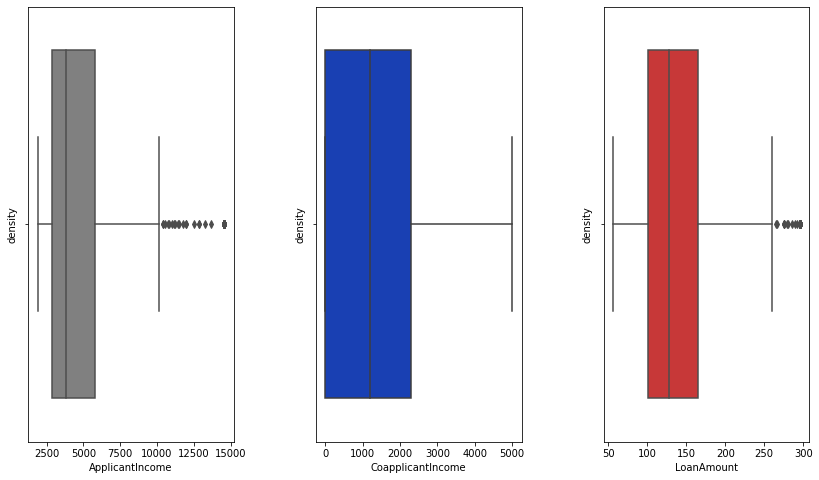

In [65]:
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(14,8))

y_labeler(axes)

sns.boxplot(data.ApplicantIncome, color='#808080', ax=axes[0], orient="v")
sns.boxplot(data.CoapplicantIncome, color='#0033cc', ax=axes[1], orient="v")
sns.boxplot(data.loc[data.LoanAmount.notnull(), 'LoanAmount'], 
                color='#df2020', ax=axes[2], orient="v")
plt.subplots_adjust(wspace=.4, hspace=.3)

## A few observations from the plot

-  It seems we have reduced significantly the number of outliers but still there are some...

-  In this case, another possible solution is to nullify (or, at least, reduce) the effect of outliers by applying a log-transformation.

-  Intuitively, applying a log-transformation to a set of observations containing extreme values has the effect of "shrinking" the whole distribution (of course, independently of the basis of the logarithm).

-  To convince yourself of why this is the case, just think what happens to the values $\{1, 5, 10, 20, 1000\}$ when you transform those by applying a $\log_{10}$ operator: $\{\log_{10}(1), \log_{10}(5), \log_{10}(10), \log_{10}(20), \log_{10}(1000)\} = \{0, 0.69, 1, 1.30, 3\}$

In [66]:
# Apply log-transformation to 'ApplicantIncome' and assign it to a new column
data['Log_ApplicantIncome'] = data.ApplicantIncome.apply(np.log)

# Apply log-transformation to 'LoanAmount' and assign it to a new column
data['Log_LoanAmount'] = data.LoanAmount.apply(np.log)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_ApplicantIncome,Log_LoanAmount
Loan_ID,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026,4.852030
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109,4.852030
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368,4.189655
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707,4.787492
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,7.972466,4.262680
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,56.0,180.0,1.0,Rural,Y,8.320205,4.025352
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8.996157,5.533389


/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


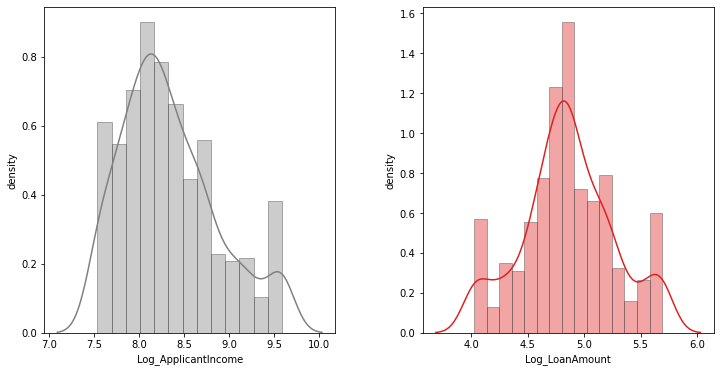

In [67]:
# Create a Figure containing 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Call the vectorized function for labeling all the y-axes
y_labeler(axes)

# Plot 'ApplicantIncome' on the first subplot
sns.distplot(data.Log_ApplicantIncome, color='#808080', ax=axes[0], 
                 hist_kws=dict(edgecolor="#404040", linewidth=1))
# Plot 'LoanAmount' (limited only to non-NA values) on the second and last subplot
sns.distplot(data.loc[data.Log_LoanAmount.notnull(), 'Log_LoanAmount'], 
                 color='#df2020', ax=axes[1], 
                 hist_kws=dict(edgecolor="#404040", linewidth=1))

# Adjust space between plots
plt.subplots_adjust(wspace=.3, hspace=.3)

## 3.3 Encoding Categorical Features

-  You should remember from our last lecture that categorical feature values might need to be transformed into numerical ones before they can be fed into the ML pipeline

-  In fact, some ML algorithms can support categorical values without further manipulation but there are many others that do not. 

-  We already mentioned two main approaches to to turn categorical into numerical values: Label Encoding and One-Hot Encoding

-  The former simply assigns a number to each category, whereas the latter transform each $k$-valued categorical feature into a $k$-dimensional binary vector.

In [68]:
# In pandas we can achieve easily one-hot encoding using the
# 'get_dummies()' function
categorical_features = [
    col for col in data.columns if not is_numeric_dtype(
        data[col]) and col != 'Loan_Status']
print(categorical_features)
data_with_dummies = pd.get_dummies(data, columns=categorical_features)
data_with_dummies.head()


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Log_ApplicantIncome,Log_LoanAmount,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,128.0,360.0,1.0,Y,8.674026,4.852030,0,1,...,0,0,0,1,0,1,0,0,0,1
LP001003,4583,1508.0,128.0,360.0,1.0,N,8.430109,4.852030,0,1,...,1,0,0,1,0,1,0,1,0,0
LP001005,3000,0.0,66.0,360.0,1.0,Y,8.006368,4.189655,0,1,...,0,0,0,1,0,0,1,0,0,1
LP001006,2583,2358.0,120.0,360.0,1.0,Y,7.856707,4.787492,0,1,...,0,0,0,0,1,1,0,0,0,1
LP001008,6000,0.0,141.0,360.0,1.0,Y,8.699515,4.948760,0,1,...,0,0,0,1,0,1,0,0,0,1


In [69]:
# Just as a convention, I prefer to place the column to be predicted
# as the last one.
columns = data_with_dummies.columns.tolist()
# Popping out 'mpg' from the list and insert it back at the end.
columns.insert(len(columns), columns.pop(columns.index('Loan_Status')))
# Let's refactor the DataFrame using this new column index
data_with_dummies = data_with_dummies.loc[:, columns]
data_with_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Log_ApplicantIncome,Log_LoanAmount,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,128.0,360.0,1.0,8.674026,4.852030,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
LP001003,4583,1508.0,128.0,360.0,1.0,8.430109,4.852030,0,1,0,...,0,0,1,0,1,0,1,0,0,N
LP001005,3000,0.0,66.0,360.0,1.0,8.006368,4.189655,0,1,0,...,0,0,1,0,0,1,0,0,1,Y
LP001006,2583,2358.0,120.0,360.0,1.0,7.856707,4.787492,0,1,0,...,0,0,0,1,1,0,0,0,1,Y
LP001008,6000,0.0,141.0,360.0,1.0,8.699515,4.948760,0,1,1,...,0,0,1,0,1,0,0,0,1,Y


## Encoding Binary Class Label

In [70]:
data = data_with_dummies
data.Loan_Status = data.Loan_Status.map(lambda x: 1 if x == 'Y' else -1)
data.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Log_ApplicantIncome,Log_LoanAmount,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,128.0,360.0,1.0,8.674026,4.852030,0,1,1,...,0,0,1,0,1,0,0,0,1,1
LP001003,4583,1508.0,128.0,360.0,1.0,8.430109,4.852030,0,1,0,...,0,0,1,0,1,0,1,0,0,-1
LP001005,3000,0.0,66.0,360.0,1.0,8.006368,4.189655,0,1,0,...,0,0,1,0,0,1,0,0,1,1
LP001006,2583,2358.0,120.0,360.0,1.0,7.856707,4.787492,0,1,0,...,0,0,0,1,1,0,0,0,1,1
LP001008,6000,0.0,141.0,360.0,1.0,8.699515,4.948760,0,1,1,...,0,0,1,0,1,0,0,0,1,1
